## Adapted from Day 3 Lab 1

#Imports

In [12]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#I. DATASET

##1. load data

In [13]:
data = load_breast_cancer()

x = data.data
y = data.target

In [14]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## OPTIONAL: visualize the binary distribution

In [ ]:
import numpy as np
counts = np.bincount(y)


plt.figure()
plt.pie(
    counts,
    labels=data.target_names,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Class Distribution in Breast Cancer Dataset")
plt.axis('equal')
plt.show()

##2. train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y)

##3. standardization

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##4. transform all to tensors

In [18]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

## 5. TensorDataset wrapper

In [19]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

## 6. DataLoader

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#II. MODEL CLASS

In [21]:
class NN2Layer(nn.Module):

    def __init__(self, input_dim, hidden_dim):

        super(NN2Layer, self).__init__()

        # input_dim = num of features, hidden_dim = num of neurons
        self.layer1 = nn.Linear(input_dim, hidden_dim)

        # hidden_dim = num of neurons, Output for binary classification is 1
        self.layer2 = nn.Linear(hidden_dim, 1)

        # non-linearity activation function
        self.relu = nn.ReLU()

        # output activation function
        self.sigmoid = nn.Sigmoid()

    # forward pass
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.sigmoid(z2)
        return a2

#III. TRAINING LOOP

In [22]:
def train_one_epoch(model, optimizer, criterion, train_loader, device):
    # Set the model to training mode
    model.train()

    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Move batch to the selected device
        X_batch = X_batch.to(device)
        y_batch = y_batch.view(-1, 1).to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass & optimization
        optimizer.zero_grad()   # Clear previous gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update model parameters

        running_loss += loss.item()

    # Average loss over all batches
    avg_loss = running_loss / len(train_loader)

    return avg_loss

#IV. VALIDATION LOOP

In [23]:
def validate(model, criterion, test_loader, device):
    # Set the model to evaluation mode
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for X_batch, y_batch in test_loader:
            # Move batch to the selected device
            X_batch = X_batch.to(device)
            y_batch = y_batch.view(-1, 1).to(device)

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            # Binary predictions
            predicted = (outputs > 0.5).float()

            # Accuracy calculation
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    avg_loss = running_loss / len(test_loader)
    accuracy = correct / total

    return avg_loss, accuracy




---



# Putting it all together: Full training run

##1. hyperparameters

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
device

device(type='cpu')

In [26]:
num_epochs = 50

In [27]:
learning_rate = 0.001

In [35]:
model = NN2Layer(30, 128)

In [36]:
criterion = nn.BCELoss()

In [37]:
optimizer = Adam(model.parameters(), lr = learning_rate)

## 2. training and validation

In [38]:
train_losses = []
val_losses = []
val_accuracies = []

In [39]:
for epoch in range(num_epochs):
  train_loss = train_one_epoch(model, optimizer, criterion, train_loader, device)
  val_loss, val_accuracy = validate(model, criterion, test_loader, device)

  train_losses.append(train_loss)
  val_losses.append(val_loss)
  val_accuracies.append(val_accuracy)

  print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

Epoch [1/50], Train Loss: 0.5510, Val Loss: 0.4119, Val Accuracy: 0.9298
Epoch [2/50], Train Loss: 0.3471, Val Loss: 0.2743, Val Accuracy: 0.9211
Epoch [3/50], Train Loss: 0.2362, Val Loss: 0.1995, Val Accuracy: 0.9386
Epoch [4/50], Train Loss: 0.1846, Val Loss: 0.1593, Val Accuracy: 0.9474
Epoch [5/50], Train Loss: 0.1477, Val Loss: 0.1368, Val Accuracy: 0.9649
Epoch [6/50], Train Loss: 0.1218, Val Loss: 0.1207, Val Accuracy: 0.9649
Epoch [7/50], Train Loss: 0.1078, Val Loss: 0.1074, Val Accuracy: 0.9561
Epoch [8/50], Train Loss: 0.0988, Val Loss: 0.0972, Val Accuracy: 0.9561
Epoch [9/50], Train Loss: 0.0926, Val Loss: 0.0893, Val Accuracy: 0.9737
Epoch [10/50], Train Loss: 0.0827, Val Loss: 0.0842, Val Accuracy: 0.9737
Epoch [11/50], Train Loss: 0.0894, Val Loss: 0.0795, Val Accuracy: 0.9825
Epoch [12/50], Train Loss: 0.0781, Val Loss: 0.0781, Val Accuracy: 0.9825
Epoch [13/50], Train Loss: 0.1025, Val Loss: 0.0725, Val Accuracy: 0.9825
Epoch [14/50], Train Loss: 0.0855, Val Loss: 0.

## 3. plotting the loss

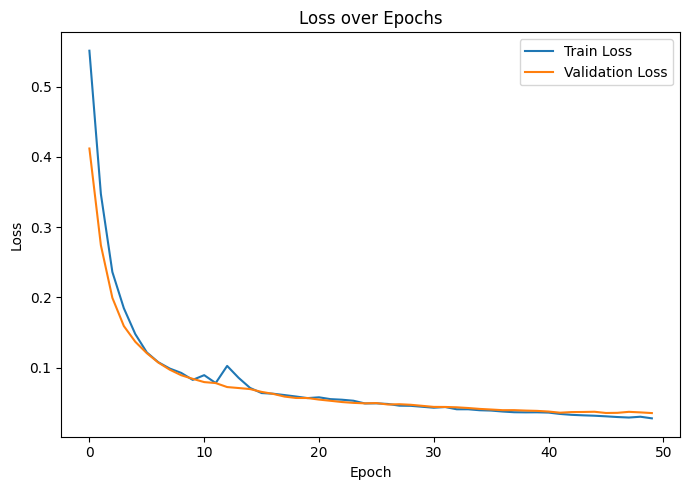

In [40]:
# Plotting results
plt.figure(figsize=(7, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()